# YELP DATASET

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [98]:
business_df = pd.read_csv('dataset/business_las_vegas_restaurant_dataset.csv', sep=',', header=0)
checkin_df = pd.read_csv('dataset/yelp_academic_dataset_checkin.csv', sep=',', header=0)
# review_df = pd.read_csv('dataset/review_las_vegas_restaurant_dataset.csv', sep=',', header=0)

In [99]:
original_df = pd.concat([business_df, checkin_df], sort=False, axis=1)

In [100]:
original_df.head()

,business_id,is_open,latitude,longitude,postal_code,review_count,stars,business_id,checkin_count
0,vJIuDBdu01vCA8y1fwR1OQ,0,36.192284,-115.159272,89106.0,3,1.5,vJIuDBdu01vCA8y1fwR1OQ,1
1,kgffcoxT6BQp-gJ-UQ7Czw,1,36.201794,-115.281981,89128.0,13,2.5,kgffcoxT6BQp-gJ-UQ7Czw,67
2,0jtRI7hVMpQHpUVtUy4ITw,1,36.201990,-115.283122,89128.0,242,4.0,0jtRI7hVMpQHpUVtUy4ITw,765
3,JJEx5wIqs9iGGATOagE8Sg,0,36.271169,-115.267759,89149.0,4,2.0,JJEx5wIqs9iGGATOagE8Sg,39
4,zhxnD7J5_sCrKSw5cwI9dQ,1,36.173140,-115.077945,89110.0,16,1.5,zhxnD7J5_sCrKSw5cwI9dQ,69


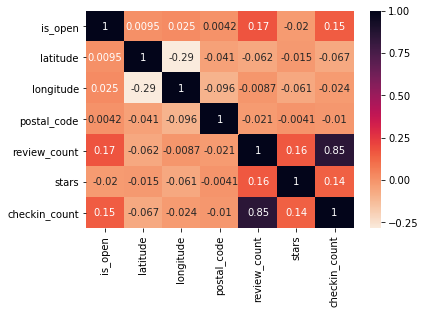

In [101]:
sns.heatmap(original_df.corr(), annot=True, cmap=sns.cm.rocket_r)

In [107]:
X = list(zip(original_df['stars'], original_df['review_count']))
Y = np.array(original_df['is_open'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [108]:
# Parâmetros Default

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)

print(metrics.accuracy_score(y_test, predicted))

0.6543878656554712


In [110]:
# Testes Manuais

In [147]:
k_range = range(1, 150)
score = []
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", algorithm="brute")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(dict(k_value=k, value=metrics.accuracy_score(y_test, y_pred)))
    scores.append(metrics.accuracy_score(y_test, y_pred))
    

Text(0,0.5,'Testing Accuracy')

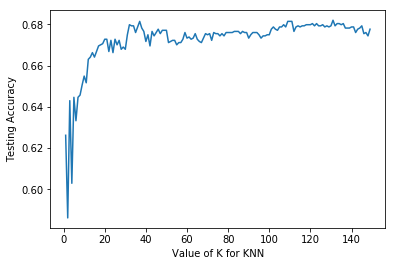

In [148]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Melhor resultado k=48

In [170]:
#VERIFICAR COMO ANALISAR
print(model.score(x_train, y_train),"\n")
print(classification_report(y_test, predicted))

0.733921523101927 

             precision    recall  f1-score   support

          0       0.59      0.33      0.42       664
          1       0.70      0.87      0.77      1182

avg / total       0.66      0.68      0.65      1846



In [50]:
# Testes com o GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)
result = grid.grid_scores_

{'n_neighbors': range(1, 150), 'weights': ['uniform', 'distance']}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=149, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 150), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [163]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7093104248897144
{'n_neighbors': 69, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=69, p=2,
           weights='uniform')


In [158]:
# Utilizando os melhores parametros

In [169]:
knn = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=69, p=2, weights='uniform')
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)

print(metrics.accuracy_score(y_test, predicted))

0.6755146262188516
